# Biol 359A | Parameter Estimation, Model Selection and Regularization
### Spring 2024, Week 5
Objectives:
- gain intuition for parameter estimation as a field

In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

## Parameter Estimation

We have spoken about using a cost function like SSE for estimating the parameters (coefficients) of linear regression models. Today we will begin by looking at parameter estimation in the context of a different type of model.

The [SIR model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology) is an ODE model used to study the rate of spread of infectious diseases in a population. Its simplest form (excluding births, deaths, and spatial spread of a population) is as follows:

$\frac{dS}{dt} = -\beta\frac{SI}{N}$

$\frac{dI}{dt} = -\beta \frac{SI}{N} - \gamma I$

$\frac{dR}{dt} = \gamma I$

Where:

$S$ = susceptible individuals

$I$ = infected individuals

$R$ = recovered individuals

$N$ = total population

$\beta$ = transmission rate

$\gamma$= recovery rate 


Lets say we had data that describes the number of infected individuals over time:

![Infected Individuals Data](images/infected_individuals_data.png)


Lets say we know the population size is 1000 and we know that initially one person was infected. So at time 0, the number of susceptible individuals was 999, the number of infected individuals was 1, and the number of recovered individuals was 0. How can we use these data to learn about the transmission rate and recovery rate of this disease?

In [34]:
# SIR model differential equations
def sir_model(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [27]:
data_df = pd.read_csv('data/individuals_infected.csv')
data_df

,infected,time
0,0,0
1,0,1
2,0,2
3,51,3
4,0,4
...,...,...
155,12,155
156,33,156
157,0,157
158,52,158


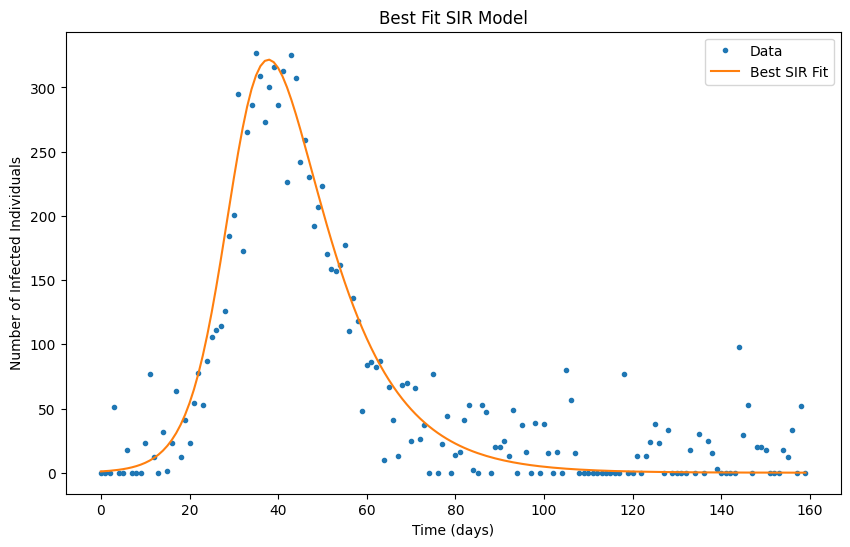

Best parameters: Beta = 0.30000000000000004 , Gamma = 0.09444444444444444
Best MSE: 749.9392760537565


In [36]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Assumed data and initial conditions
data = data_df['infected'].values
t = data_df['time'].values
N = 1000  # Total population
I0 = 1  # Initial number of infected individuals
S0 = N - I0  # Initial number of susceptible individuals
R0 = 0  # Initial number of recovered individuals

# Define a function to perform parameter estimation
def estimate_parameters(beta_range, gamma_range, num_samples):
    beta_values = np.linspace(beta_range[0], beta_range[1], num_samples)
    gamma_values = np.linspace(gamma_range[0], gamma_range[1], num_samples)
    best_mse = float('inf')
    best_params = None
    best_fit = None
    
    for beta in beta_values:
        for gamma in gamma_values:
            # Solve SIR model
            ret = odeint(sir_model, [S0, I0, R0], t, args=(N, beta, gamma))
            S, I, R = ret.T
            
            # Compute the MSE
            mse = np.mean((I - data)**2)
            if mse < best_mse:
                best_mse = mse
                best_params = (beta, gamma)
                best_fit = I
    
    # Plotting the best fit
    plt.figure(figsize=(10, 6))
    plt.plot(t, data, '.', label='Data')
    plt.plot(t, best_fit, '-', label='Best SIR Fit')
    plt.xlabel('Time (days)')
    plt.ylabel('Number of Infected Individuals')
    plt.title('Best Fit SIR Model')
    plt.legend()
    plt.show()
    
    return best_params, best_mse

# Example usage
beta_range = (0.1, 1.0)  # range of beta to test
gamma_range = (0.01, 0.2)  # range of gamma to test
num_samples = 10  # number of values to sample in each range

best_params, best_mse = estimate_parameters(beta_range, gamma_range, num_samples)
print("Best parameters: Beta =", best_params[0], ", Gamma =", best_params[1])
print("Best MSE:", best_mse)